## Predicting Student Success Rate
Used Tutorial for PCA guidance from https://www.jcchouinard.com/pca-with-python/

Steps:
- Visualize and understand data

In [42]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import missingno as msno
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from mlxtend.evaluate import bias_variance_decomp

# Data Validaiton
Read the CSV file, view available features, and validate the data.

In [43]:
df = pd.read_csv('data.csv', sep=';')
df.head(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


<Axes: >

/Users/alik/opt/miniconda3/envs/ml_hw2/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/Users/alik/opt/miniconda3/envs/ml_hw2/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


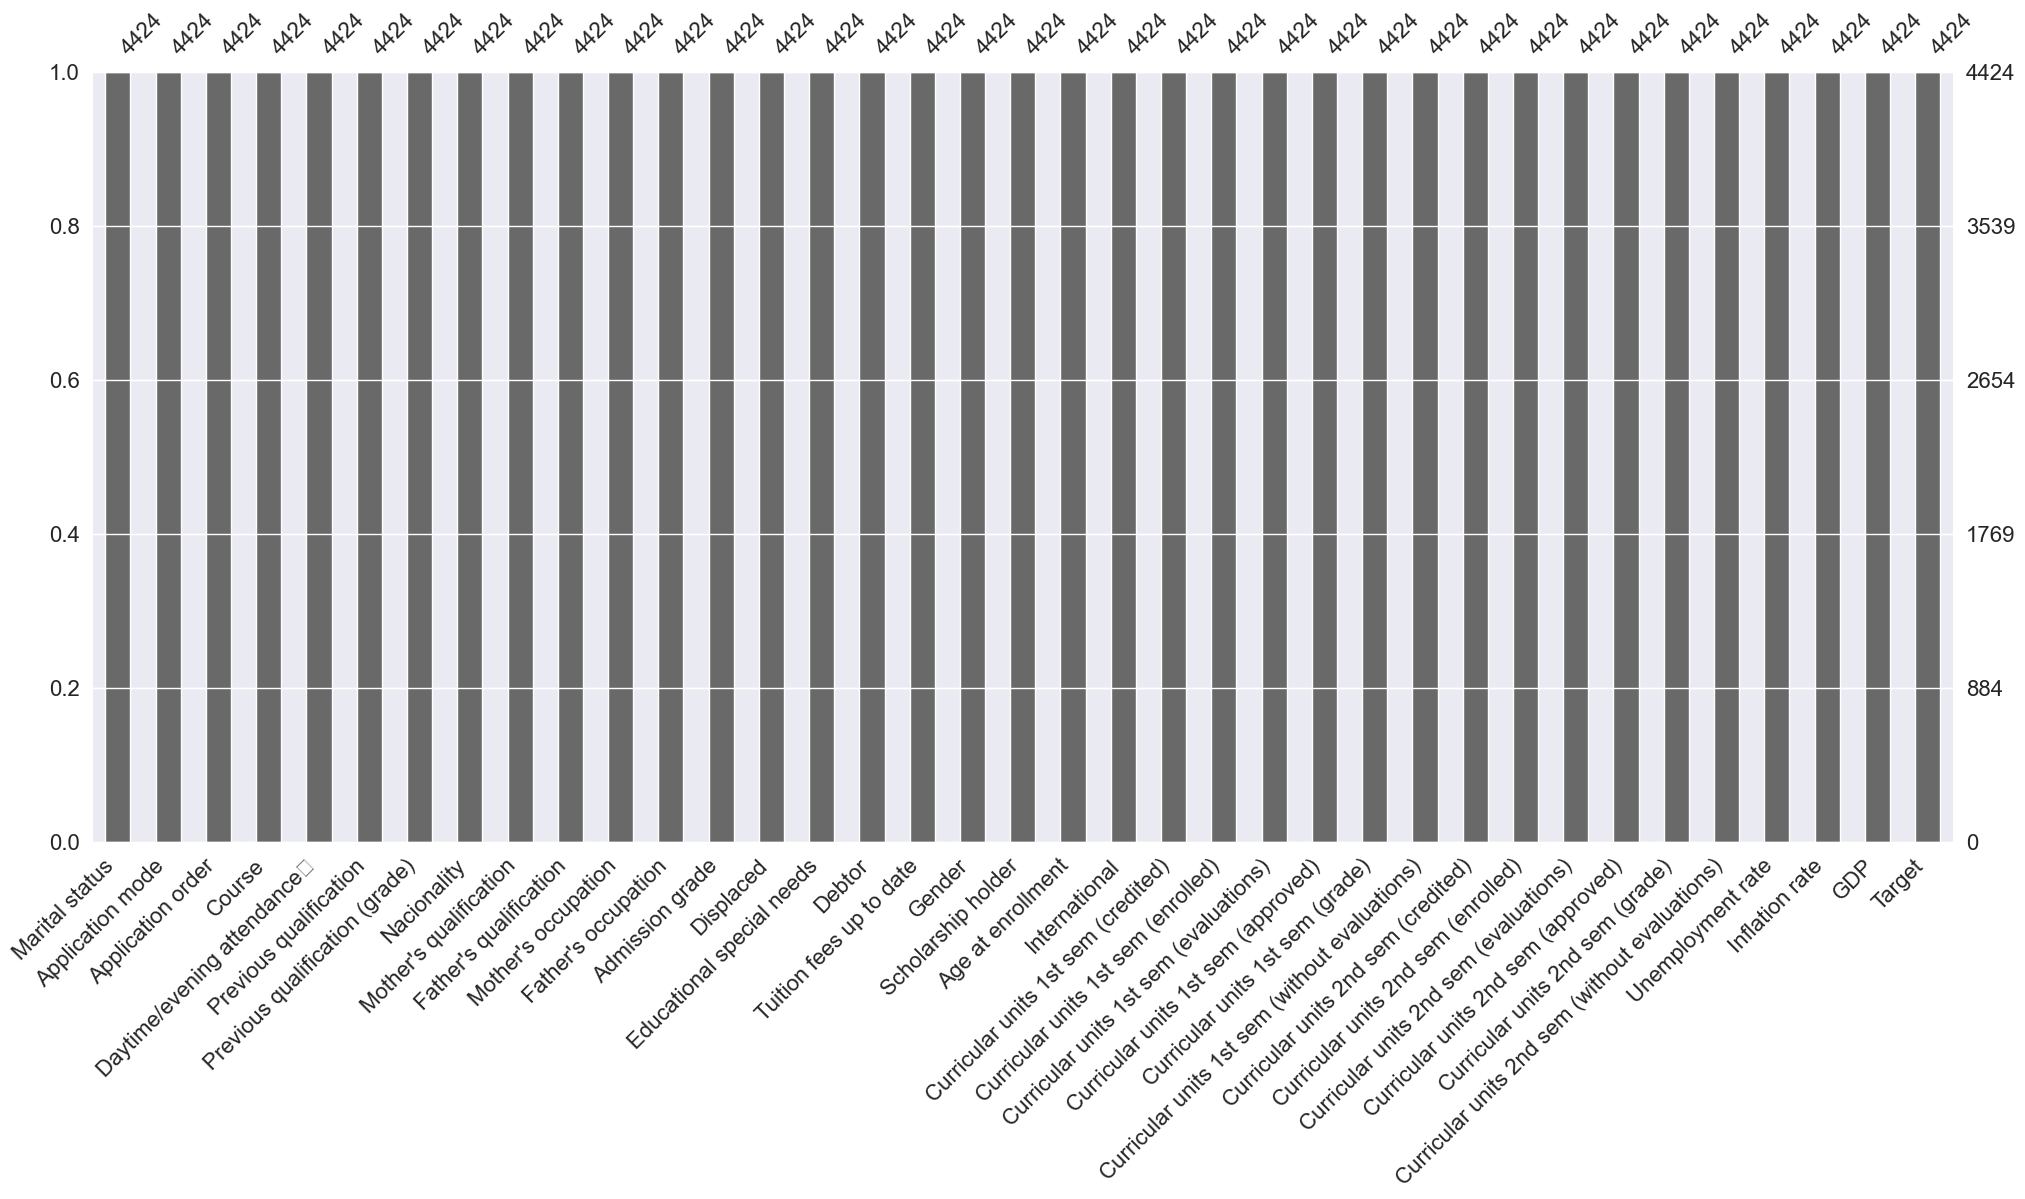

In [44]:
# Missing data detection
msno.bar(df)

We can see that there are no null entries as all the columns are equally populated and there are no missing values for each column.
We can also check that we have a good ratio of dropout to graduate/enrolled students so we can train our model properly.

In [126]:
df_arr = df.to_numpy()
num_dropouts = np.sum(df_arr[:,-1] == "Dropout")
print("Number of dropout data points: " + str(num_dropouts))
print("Number of total data points: " + str(len(df_arr)))
print("Ratio of droupout to total data points: " + str(num_dropouts / len(df_arr))[0:5])

Number of dropout data points: 1421
Number of total data points: 4424
Ratio of droupout to total data points: 0.321


# Splitting Data
Now we split the data into 80/20 training and testing groups.

In [127]:
n_train = np.floor(0.8*4224).astype(int)
train_data = df_arr[0:n_train, :]
test_data = df_arr[n_train:, :]
print('Training Data Points: ', train_data.shape[0])
print('Testing Data Points: ', test_data.shape[0])

Training Data Points:  3379
Testing Data Points:  1045


In [128]:
# Create X matrix and y vector
X_train = train_data[:, :-1]
X_train = StandardScaler().fit_transform(X) # Standardizes features with 0 mean and unit variance
y_train = train_data[:, -1]
display(y_train)

# Reformat label with dropout as 0 and graduate or enrolled as 1
target_dict = {'Dropout': 0, 'Graduate': 1, 'Enrolled':1}
target_names = {0:'Dropout', 1:'Graduate or Enrolled'}
y_train = np.array([target_dict[val] for val in y_train])
print(y_train)

array(['Dropout', 'Graduate', 'Dropout', ..., 'Graduate', 'Graduate',
       'Enrolled'], dtype=object)

[0 1 0 ... 1 1 1]


# Dimensionality reduction

Next, use Principal Component Analysis (PCA) for dimensionality reduction.
First we'll try reducing the 36 original features down to 10.

Shape before PCA:  (3379, 36)
Shape after PCA:  (3379, 10)


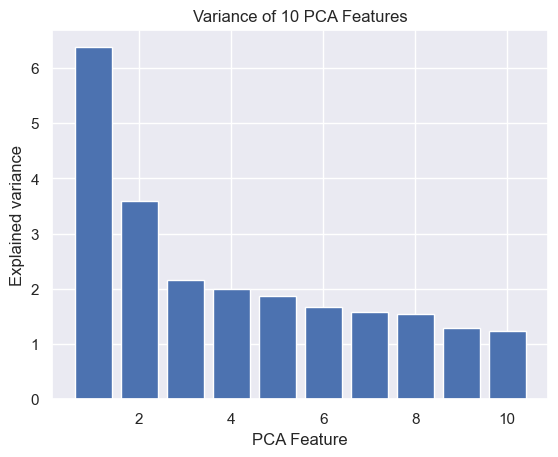

In [129]:
# PCA With 10 Features
pca_10 = decomposition.PCA(n_components=10)
pca_10.fit(X_train)
X_10 = pca_10.transform(X_train)
print('Shape before PCA: ', X_train.shape)
print('Shape after PCA: ', X_10.shape)

# Determine variance of the 10 Principal Components (PCs) created by PCA
pca_10.explained_variance_
plt.bar(range(1, len(pca_10.explained_variance_) + 1), pca_10.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Variance of 10 PCA Features')
plt.show()

From this, we can see that the first 2 features seem to be the most informative, so let's perform PCA with 2 features

In [130]:
# PCA With 2 Features
pca_2 = decomposition.PCA(n_components=2)
pca_2.fit(X_train)
X_2 = pca_2.transform(X_train)
print('Shape before PCA: ', X_train.shape)
print('Shape after PCA: ', X_2.shape)

Shape before PCA:  (3379, 36)
Shape after PCA:  (3379, 2)


Now lets plot the data after PCA

           PC1       PC2                target
0    -6.130469 -0.228280               Dropout
1    -0.229564 -1.095397  Graduate or Enrolled
2    -3.956741  0.474844               Dropout
3     0.441241 -0.955015  Graduate or Enrolled
4     0.416298  2.761013  Graduate or Enrolled
...        ...       ...                   ...
3374  0.035070 -1.655029  Graduate or Enrolled
3375  1.255391  0.396810  Graduate or Enrolled
3376  0.414904 -1.667427  Graduate or Enrolled
3377  0.807560 -1.160791  Graduate or Enrolled
3378 -0.659505 -0.328266  Graduate or Enrolled

[3379 rows x 3 columns]


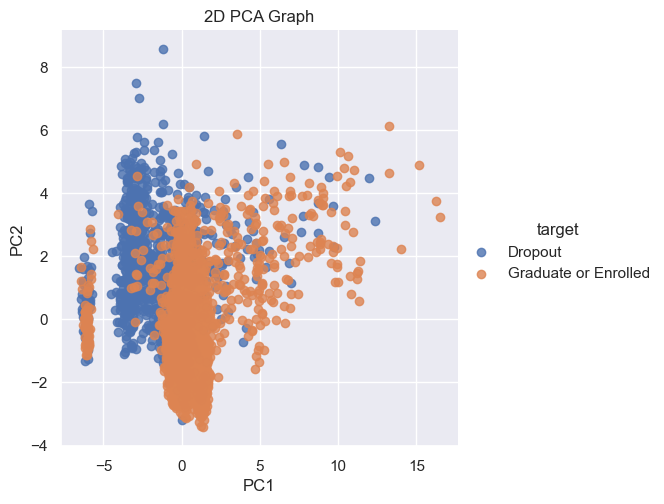

In [141]:
sns.set()
pca_df = pd.DataFrame(data=X_2, columns=['PC1', 'PC2'])
pca_df['target'] = [target_names[target] for target in y_train]
print(pca_df)

sns.lmplot(x='PC1', y='PC2', data=pca_df, hue='target', fit_reg=False, legend=True)
plt.title('2D PCA Graph')
plt.show()

Let's see how different features are being taken into account with each principal component

In [132]:
# Principal components correlation coefficients
comps = pca_2.components_
 
# Number of features before PCA
n_features = pca_2.n_features_
 
# Feature names before PCA
feature_names = df.columns[:-1]
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, comps))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

/Users/alik/opt/miniconda3/envs/ml_hw2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2
feature_names,,
Marital status,0.017437,0.251332
Application mode,0.062687,0.358233
Application order,-0.015585,-0.224455
Course,0.136009,-0.043122
Daytime/evening attendance\t,-0.014399,-0.252854
Previous qualification,0.054957,0.172157
Previous qualification (grade),-0.007507,-0.066962
Nacionality,-0.011275,-0.005937
Mother's qualification,0.012825,0.160855


# Fitting a Model
We used logistic regression to fit our data.

In [133]:
pca_30 = decomposition.PCA(n_components=30)
pca_30.fit(X_train)
X_30 = pca_30.transform(X_train)

Regression With 30 Features

In [134]:
clf = LogisticRegression()
clf.fit(X_30, y_train)

LogisticRegression()

In [135]:
X_test = test_data[:, :-1]
X_test = StandardScaler().fit_transform(X_test)
X_test_30 = pca_30.transform(X_test)
y_test = [target_dict[val] for val in test_data[:, -1]]
y_pred = clf.predict(X_test_30)

In [136]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.39531023368251406

In [137]:
mse, bias, var = bias_variance_decomp(clf, X_30, y_train, X_test_30, np.array(y_test), loss='mse', num_rounds=200, random_seed=123)

In [138]:
print(mse)
print(bias)
print(var)

0.1481531100478469
0.13578569377990432
0.012367416267942584


In [139]:
accuracy = balanced_accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.81
Confusion matrix:
[[239 126]
 [ 27 653]]


Regression With 10 Features

In [142]:
clf = LogisticRegression()
clf.fit(X_10, y_train)

X_test_10 = pca_10.transform(X_test)
y_pred = clf.predict(X_test_10)

accuracy = balanced_accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.78
Confusion matrix:
[[231 134]
 [ 48 632]]


Regression with 2 Features

In [143]:
clf = LogisticRegression()
clf.fit(X_2, y_train)

X_test_2 = pca_2.transform(X_test)
y_pred = clf.predict(X_test_2)

accuracy = balanced_accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion matrix:")
print(conf_matrix)

Accuracy: 0.72
Confusion matrix:
[[189 176]
 [ 59 621]]
